In [33]:
import pandas as pd

In [34]:
# Indlæs data og bestem antallet af rækker og kolonner.
df = pd.read_csv('ML_apple_quality.csv')
df.shape

(4001, 9)

In [35]:
# Bestem datatyperne for de enkelte kolonner.
df.dtypes

A_id           float64
Size           float64
Weight         float64
Sweetness      float64
Crunchiness    float64
Juiciness      float64
Ripeness       float64
Acidity         object
Quality         object
dtype: object

In [36]:
# Vis de første rækker i datasættet.
df.head(3)

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad


In [37]:
# Vis de sidste rækker i datasættet.
df.tail(3)

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good
3999,3999.0,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796456,good
4000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Created_by_Nidula_Elgiriyewithana,NaN


In [38]:
# Fjern den sidste række i datasættet, som åbenlyst ikke hører hjemme der.
# Vi kender index, som er 4000
df = df.drop(4000)
df.tail(3)

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good
3999,3999.0,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796456,good


In [39]:
# Undersøg, om der mangler værdier andre steder
df.isna().sum()

A_id           0
Size           1
Weight         0
Sweetness      1
Crunchiness    0
Juiciness      1
Ripeness       1
Acidity        0
Quality        0
dtype: int64

In [40]:
# Vi ser, at der er fire manglende værdier.
# Vi vælger den mulighed, som er at fjerne alle de rækker, hvor der er manglende værdier, fra datasættet.
df = df.dropna()

In [41]:
df.isna().sum()

A_id           0
Size           0
Weight         0
Sweetness      0
Crunchiness    0
Juiciness      0
Ripeness       0
Acidity        0
Quality        0
dtype: int64

In [42]:
df.shape

(3996, 9)

In [43]:
# Vi undersøger kolonnen 'Acidity' nærmere, da den har datatypen 'object'. Burde den være en 'float64' som de andre?
# Vi prøver at konvertere den til 'float64' og ser, om vi får en fejl.
df['Acidity'] = df['Acidity'].apply(pd.to_numeric)

In [44]:
df.dtypes

A_id           float64
Size           float64
Weight         float64
Sweetness      float64
Crunchiness    float64
Juiciness      float64
Ripeness       float64
Acidity        float64
Quality         object
dtype: object

In [45]:
# Kolonnen 'Quality' burde måske være en 'category' datatype, da den angiver om æblerne er gode eller dårlige (enten eller).
df['Quality'] = df['Quality'].astype('category')

In [46]:
df.dtypes

A_id            float64
Size            float64
Weight          float64
Sweetness       float64
Crunchiness     float64
Juiciness       float64
Ripeness        float64
Acidity         float64
Quality        category
dtype: object

In [47]:
# Kolonnen 'A_id' burde egentlig være et index med hele tal. Det er bare fortløbende nummerering af stikprøvens æbler.
df['A_id'] = df['A_id'].astype('int') # Konverterer datatypen fra 'float64' til 'int64'
df.set_index(df['A_id']) # Angiver kolonnen 'A_id' som index
df = df.drop(columns=['A_id']) # Fjerner kolonnen 'A_id', da den nu er gemt i indekset

In [48]:
# Vi kan lave simpel statistisk analyse på de forskellige kolonner
# mindsteværdi, størsteværdi, middelværdi, standardafvigelse/spredning, median
# Vi tager 'Size' som et eksempel
import numpy as np
apple_sizes = df['Size']
print('Mindsteværdien er {}'.format(np.min(apple_sizes)))
print('Størsteværdien er {}'.format(np.max(apple_sizes)))
print('Middelværdien er {}'.format(np.mean(apple_sizes)))
print('Medianen er {}'.format(np.median(apple_sizes)))
print('Standardafvigelsen er {}'.format(np.std(apple_sizes)))
print(f"Mindsteværdien er {np.min(apple_sizes)}")

Mindsteværdien er -7.151703059
Størsteværdien er 6.406366899
Middelværdien er -0.5016601963198198
Medianen er -0.512366463
Standardafvigelsen er 1.9276978909251181
Mindsteværdien er -7.151703059


In [49]:
# Man kan også bruge metoden 'describe':
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Size,3996.0,-0.501660,1.927939,-7.151703,-1.815958,-0.512366,0.806325,6.406367
Weight,3996.0,-0.990192,1.602175,-7.149848,-2.011770,-0.984736,0.029682,5.790714
Sweetness,3996.0,-0.471968,1.943692,-6.894485,-1.738545,-0.506559,0.794418,6.374916
Crunchiness,3996.0,0.985527,1.403032,-6.055058,0.062764,0.998249,1.894234,7.619852
Juiciness,3996.0,0.511474,1.931029,-5.961897,-0.801502,0.533062,1.836668,7.364403
Ripeness,3996.0,0.498316,1.874934,-5.864599,-0.771677,0.503445,1.766212,7.237837
Acidity,3996.0,0.076116,2.110921,-7.010538,-1.378172,0.022326,1.510493,7.404736


In [50]:
# Hvad mon negative værdier af størrelsen betyder?
# Der er sket en transformation af data på en eller anden måde.
# Man må antage, at ordningen er bevaret.

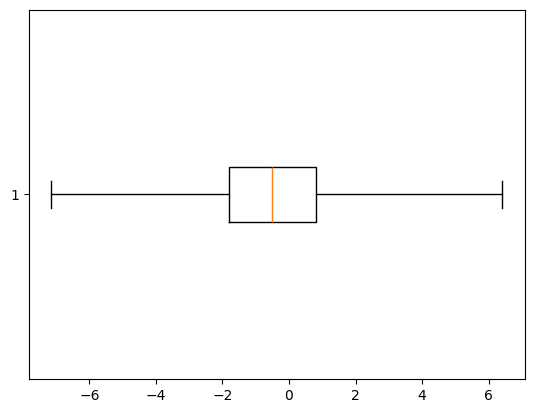

In [51]:
# Vi kan illustrere de simple deskriptorer i et boksplot.
import matplotlib.pyplot as plt
plt.boxplot(apple_sizes, vert=False, whis=(0,100));

<Axes: >

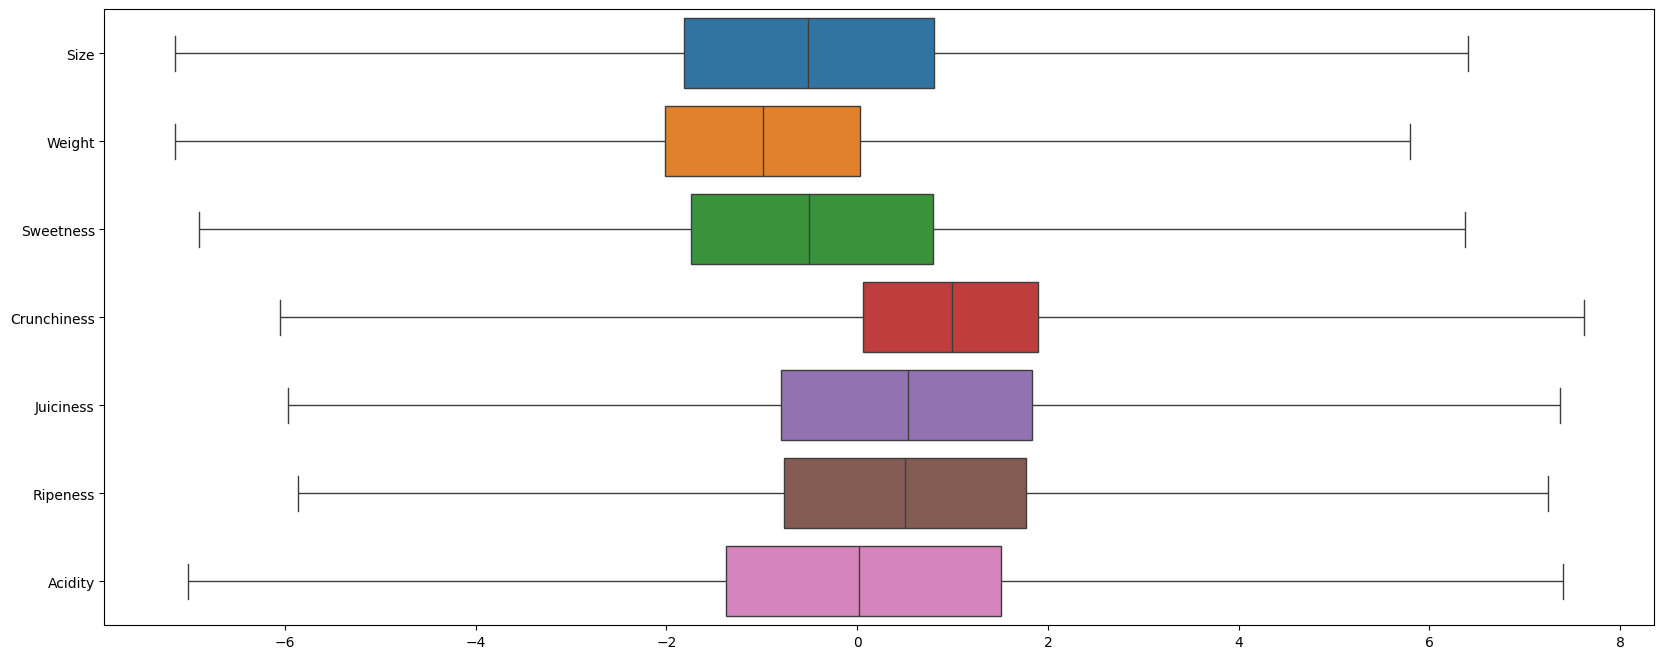

In [52]:
# Vi kan igen gøre det mere effektivt
import seaborn as sns
fig = plt.figure(figsize=(20,8))
sns.boxplot(df, whis=(0,100), orient='h')

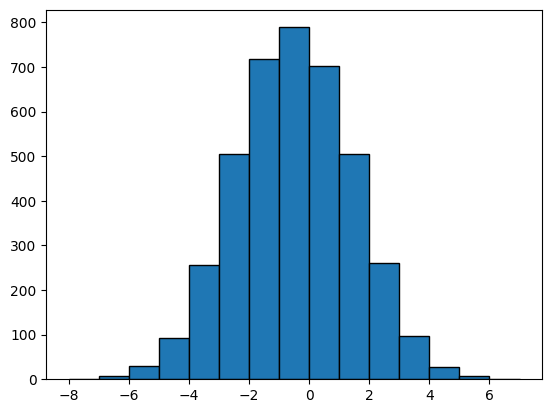

In [53]:
# Vi kan også lave et histogram på baggrund af selvvalgte intervalinddelinger (kaldet bins)
# Intervaller af længden 1 fra -8 til 7 anvendes
bins = [x for x in range(-8,8,1)]
plt.hist(apple_sizes, bins=bins, edgecolor='black');

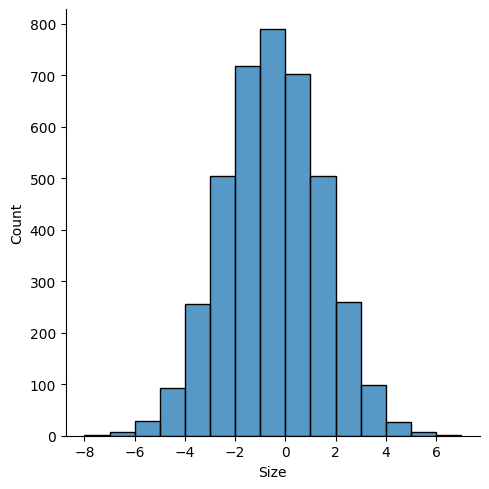

In [54]:
# Vi kan også bruge 'seaborn' til at lave histogrammer
sns.displot(df['Size'], bins=bins);

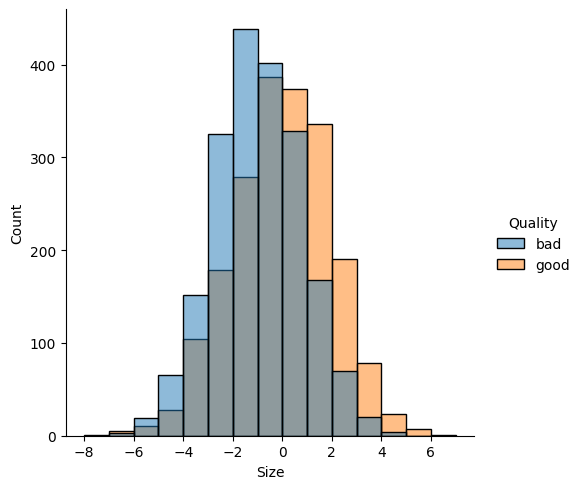

In [55]:
# Vi kan opdele på gode og dårlige æbler
sns.displot(df[['Size', 'Quality']], x='Size', bins=bins, hue='Quality')

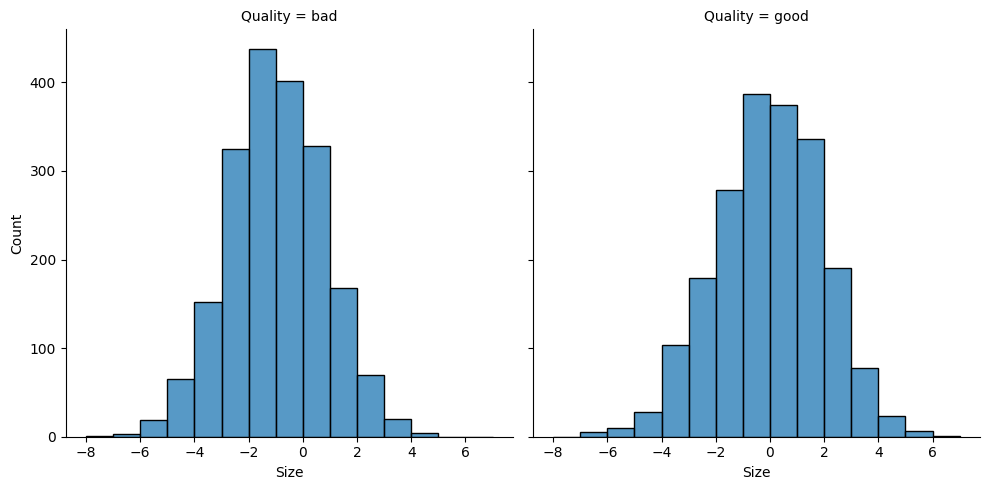

In [56]:
sns.displot(df[['Size', 'Quality']], x='Size', bins=bins, col='Quality')

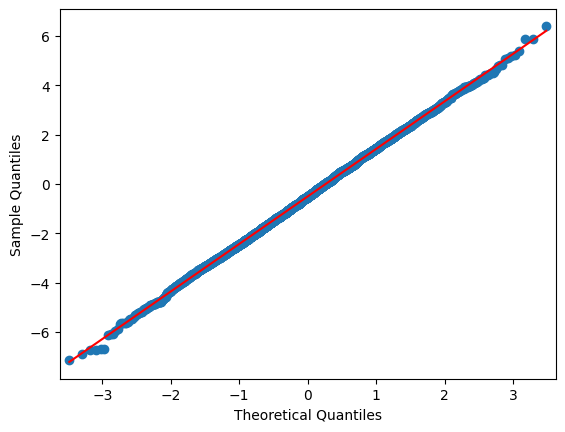

In [57]:
# Lidt avanceret: Vi kan undersøge, om størrelserne med god tilnærmelse er normalfordelte.
import statsmodels.api as sm
fig = sm.qqplot(apple_sizes, line='s')
plt.show()

In [58]:
# Da datakvantilerne med god tilnærmelse ligger på den "teoretisk linje", ser det ud
# til, at data med god tilnærmelse er normalfordelte.

In [59]:
colors = np.where(df["Quality"]=="good",'red','green')

<Axes: xlabel='Juiciness', ylabel='Crunchiness'>

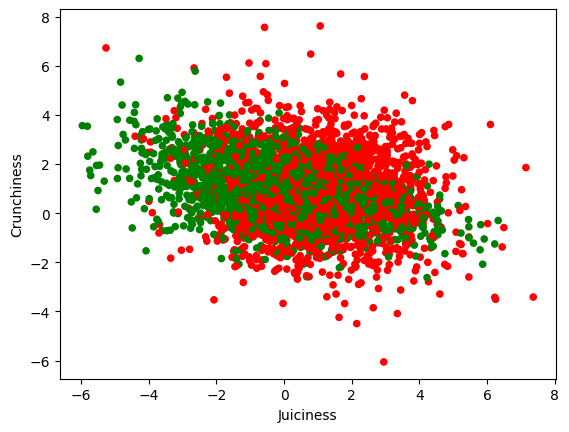

In [60]:
df.plot.scatter(x="Juiciness", y="Crunchiness", c=colors)